In [1]:
from __future__ import division
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df_train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


### Examine the data

In [4]:
# check the class distribution for the author label in the train_df
df_train.author.value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

In [5]:
df_train.groupby('author').describe()

id                       text         \
       count unique      top freq count unique   
author                                           
EAP     7900   7900  id09197    1  7900   7900   
HPL     5635   5635  id10091    1  5635   5635   
MWS     6044   6044  id07556    1  6044   6044   

                                                                
                                                      top freq  
author                                                          
EAP     The owner will, no doubt, insist upon rewardin...    1  
HPL     Again he seemed to be in the interior of a hou...    1  
MWS     You will find a happy, cheerful home and frien...    1

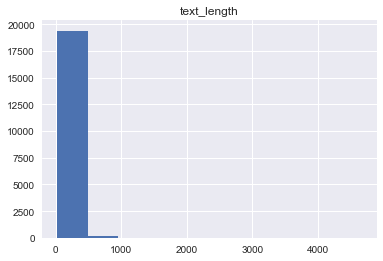

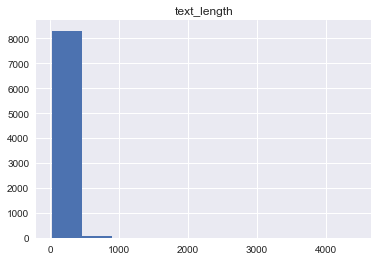

In [6]:
# calcualte the character length for each rows text column
df_train['text_length'] = df_train.text.str.len()
df_test['text_length'] = df_test.text.str.len()

# train_df = train_df.rename(columns={'text': 'original_text'})
# test_df = train_df.rename(columns={'text': 'original_text'})

# look at the histogram plot for the text length
sns.set()
df_train.hist()
plt.show()
# It shows us that most of the text length are 500 chars and less.
# We might also like to look at the summary stats of the text lengths by author
# Also compare those stats with the similar stats in test_df

sns.set()
df_test.hist()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111eb6208>,
      dtype=object)

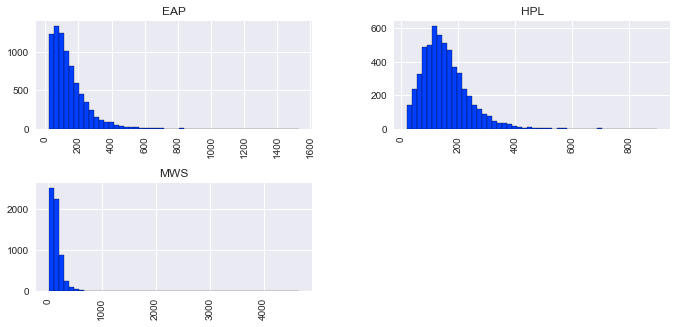

In [7]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
df_train.hist(column='text_length', by='author', bins=50, figsize=(11,5))

### Data pre-processing

In [8]:
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [9]:
text_features = df_train['text'].copy()
text_features.head()

0    This process, however, afforded me no means of...
1    It never once occurred to me that the fumbling...
2    In his left hand was a gold snuff box, from wh...
3    How lovely is spring As we looked from Windsor...
4    Finding nothing else, not even gold, the Super...
Name: text, dtype: object

In [10]:
def text_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return ' '.join(text)

In [11]:
text_features = text_features.apply(text_process)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# TODO Do we need to multiple vectorizer?
# TODO Can we use multiple vectorizer?
# TODO Which vectorizer works best in which case?

vect_tfid = TfidfVectorizer('english')
# vect_count = CountVectorizer(lowercase=False, token_pattern=r'(?u)\b\w+\b|\,|\.|\;|:')

features = vect_tfid.fit_transform(text_features)
# features = vect_count.fit_transform(text_features)

print(type(features))

<class 'scipy.sparse.csr.csr_matrix'>


In [13]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_train['author_num'] = le.fit_transform(df_train['author'])

df_train.head()

,id,text,author,text_length,author_num
0,id26305,"This process, however, afforded me no means of...",EAP,231,0
1,id17569,It never once occurred to me that the fumbling...,HPL,71,1
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,200,0
3,id27763,How lovely is spring As we looked from Windsor...,MWS,206,2
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,174,1


In [38]:
author_map = {0: 'EAP', 1: 'HPL', 2: 'MWS'}

### Define X and y from train data

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, df_train['author_num'], test_size=0.2, random_state=123)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(15663, 25257) (15663,) (3916, 25257) (3916,)


### Build and evaluate a model using Multinomial Naive Bayes

In [15]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# nb = MultinomialNB()

# grid_values = {'alpha': [0.01, 0.1, 1, 10, 100]}
# grid_nb = GridSearchCV(nb, param_grid=grid_values, scoring='neg_log_loss')
# grid_nb.fit(X_train_dtm, y_train)
# grid_nb.best_params_

In [16]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [17]:
# nb1 = MultinomialNB(alpha=0.1)
# nb1.fit(X_train_dtm, y_train)
# # y_pred_test = nb.predict(X_test_dtm)
# pred = nb1.predict(X_test_dtm)
# acc_score = accuracy_score(y_test, pred)

# acc_score
# pred

### Train and evaluate model on multiple algorithms

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [19]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [20]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [21]:
def train_classifier(clf, X_train, y_train):
    clf.fit(X_train, y_train)

In [22]:
pred_scores = []
for k, v in clfs.items():
    train_classifier(v, X_train, y_train)
    pred = predict_labels(v, X_test)
    pred_scores.append((k, [accuracy_score(y_test, pred)]))

print(pred_scores)

[('SVC', [0.8023493360572013]), ('KN', [0.7114402451481103]), ('NB', [0.8363125638406538]), ('DT', [0.5944841675178754]), ('LR', [0.7298263534218591]), ('RF', [0.6892236976506639]), ('AdaBoost', [0.5760980592441267]), ('BgC', [0.6483656792645557]), ('ETC', [0.6818181818181818])]


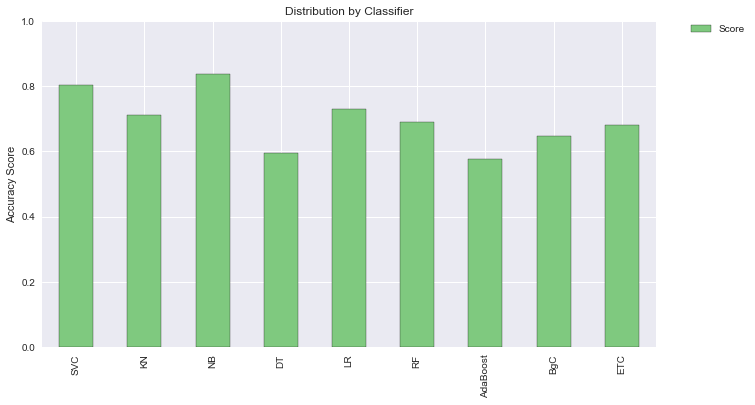

In [23]:
df_plot1 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])

df_plot1.plot(kind='bar', ylim=(0.0,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df_plot1.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Classifying with stemmer and other features

In [24]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [25]:
text_features = text_features.apply(stemmer)

In [26]:
features = vect_tfid.fit_transform(text_features)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, df_train['author_num'], test_size=0.3, random_state=111)

In [28]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, X_train, y_train)
    pred = predict_labels(v, X_test)
    pred_scores.append((k, [accuracy_score(y_test, pred)]))

In [29]:
pred_scores

[('SVC', [0.7997957099080695]),
 ('KN', [0.6879468845760981]),
 ('NB', [0.8304392236976507]),
 ('DT', [0.6046986721144024]),
 ('LR', [0.7565543071161048]),
 ('RF', [0.7061627511065713]),
 ('AdaBoost', [0.6031664964249234]),
 ('BgC', [0.6598569969356486]),
 ('ETC', [0.6942458290772897])]

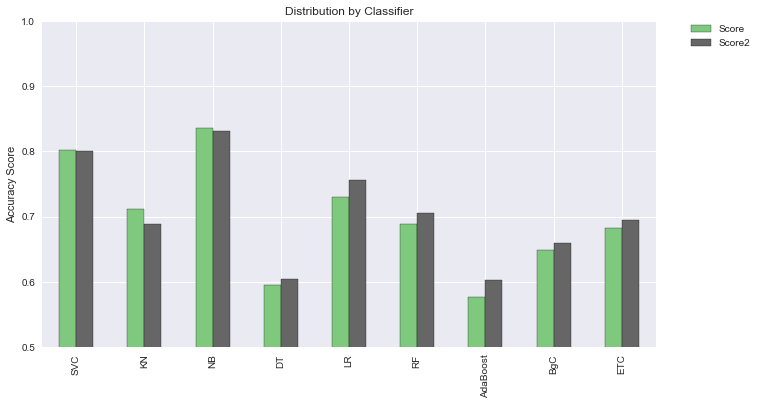

In [30]:
df_plot2 = pd.DataFrame.from_items(pred_scores, orient='index', columns=['Score2'])
df_plot2 = pd.concat([df_plot1, df_plot2],axis=1)

df_plot2.plot(kind='bar', ylim=(0.5, 1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df_plot2.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Train and find the predicated probability using MNB

In [31]:
test_text_features = df_test['text'].copy()

test_text_features = test_text_features.apply(text_process)


In [32]:
test_features = vect_tfid.transform(test_text_features)

In [33]:
test_features.shape

(8392, 15142)

In [34]:
pred_proba = mnb.predict_proba(test_features)

pred_proba

array([[0.08784466, 0.11756561, 0.79458973],
       [0.82162658, 0.11568888, 0.06268454],
       [0.4631336 , 0.4364849 , 0.10038149],
       ...,
       [0.67964355, 0.08296033, 0.23739612],
       [0.39506743, 0.07620786, 0.52872471],
       [0.61377132, 0.31196178, 0.07426689]])

In [36]:
df_test.head()

,id,text,text_length
0,id02310,"Still, as I urged our leaving Ireland with suc...",110
1,id24541,"If a fire wanted fanning, it could readily be ...",330
2,id00134,And when they had broken down the frail door t...,189
3,id27757,While I was thinking how I should possibly man...,223
4,id04081,I am not sure to what limit his knowledge may ...,53


In [39]:
author_map

{0: 'EAP', 1: 'HPL', 2: 'MWS'}

In [40]:
df_test_result = pd.DataFrame(columns=['id', 'EAP', 'HPL', 'MWS'])

In [53]:
for i in range(len(pred_proba)):
    # df_test_result
    # print(df_test.loc[i]['id'])
    # print(pred_proba[i][0])
    # df_test_result.append([df_test.iloc[i]['id'], pred_proba[i][0], pred_proba[i][1], pred_proba[i][2]], ignore_index=True)
    df_test_result.loc[i] = [df_test.iloc[i]['id'], pred_proba[i][0], pred_proba[i][1], pred_proba[i][2]]

df_test_result.head()

,id,EAP,HPL,MWS
0,id02310,0.087845,0.117566,0.794590
1,id24541,0.821627,0.115689,0.062685
2,id00134,0.463134,0.436485,0.100381
3,id27757,0.183672,0.730488,0.085841
4,id04081,0.811317,0.112268,0.076416


In [54]:
df_test_result.to_csv('data/submission.csv', index=False)